In [6]:
##########################################
###   Download a file and extract it   ###
##########################################

import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_dataset(url=HOUSING_URL, path=HOUSING_PATH):
    # Make directory
    os.makedirs(path, exist_ok=True)
    
    #Download
    tgz_path = os.path.join(path, 'housing.tgz')
    urllib.request.urlretrieve(url, tgz_path)
    
    # Extract
    tgz_file = tarfile.open(tgz_path)
    tgz_file.extractall(path=path)
    tgz_file.close()

In [7]:
fetch_dataset(HOUSING_URL, HOUSING_PATH)

In [8]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [12]:
housing = load_housing_data()

In [13]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafa5dbbf70>,
      dtype=object)

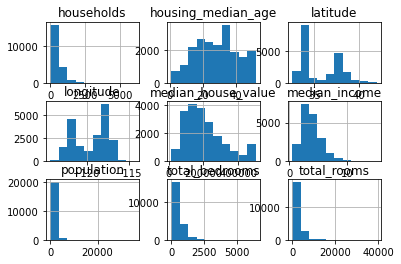

In [14]:
housing.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafa50749d0>,
      dtype=object)

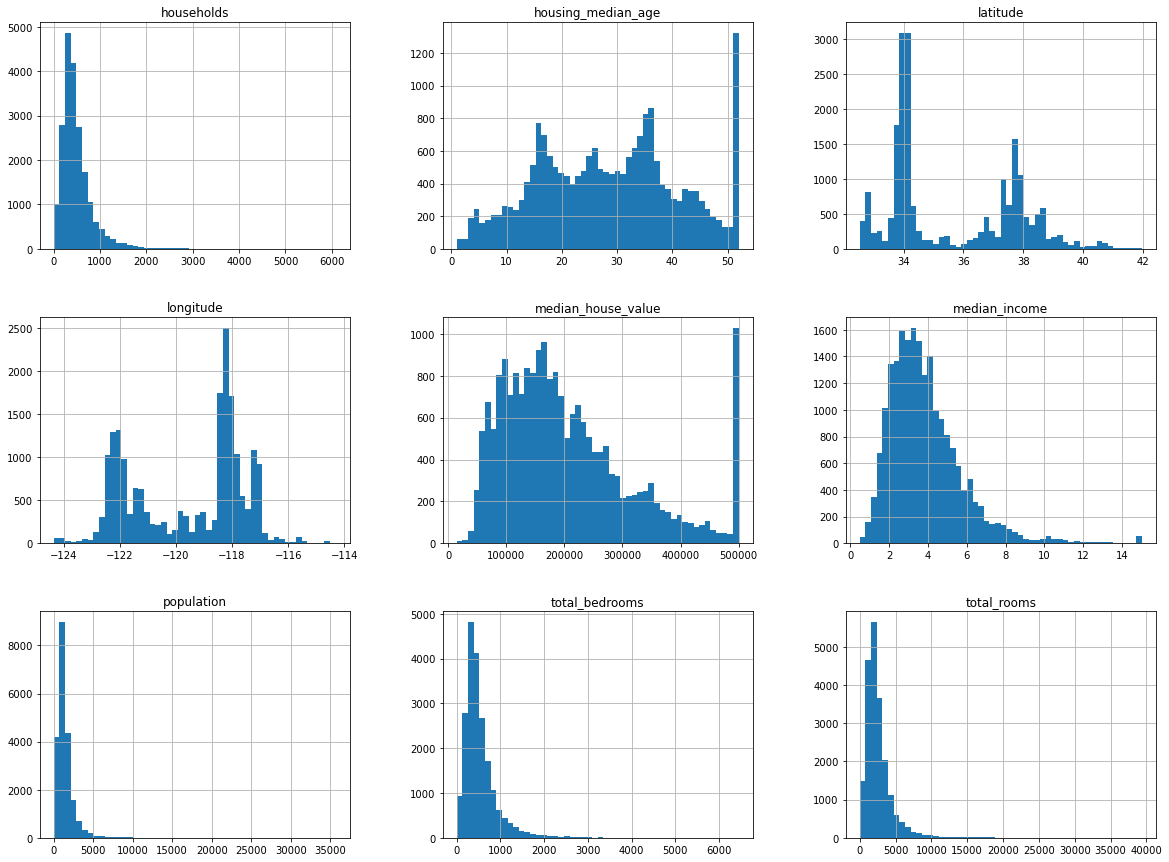

In [16]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))

In [ ]:
##############################################
###   Split the data into train and test   ###
##########################################


def split_train_test(data, test_ratio):
    """
    Function to perform train and test split
    param: data - the original dataset
    param: test_ratio - the ratio of data to keep as test
    returns: train data and test data
    """
    # Shuffle the data
    shuffled_indices = np.random.permutation(len(data))
    
    # Size of test set
    test_set_size = int(len(data) * test_ratio)
    
    # Defining the indices
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]